In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

In [4]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [5]:
# Display the first few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
# Check the shape of the data
print(df.shape)


(1000, 9)


In [7]:
# Check the data types of each column
print(df.dtypes)



Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [8]:
# Summary of the dataset
print(df.describe(include='all'))

        Transaction ID        Date Customer ID  Gender         Age  \
count      1000.000000        1000        1000    1000  1000.00000   
unique             NaN         345        1000       2         NaN   
top                NaN  2023-05-16    CUST1000  Female         NaN   
freq               NaN          11           1     510         NaN   
mean        500.500000         NaN         NaN     NaN    41.39200   
std         288.819436         NaN         NaN     NaN    13.68143   
min           1.000000         NaN         NaN     NaN    18.00000   
25%         250.750000         NaN         NaN     NaN    29.00000   
50%         500.500000         NaN         NaN     NaN    42.00000   
75%         750.250000         NaN         NaN     NaN    53.00000   
max        1000.000000         NaN         NaN     NaN    64.00000   

       Product Category     Quantity  Price per Unit  Total Amount  
count              1000  1000.000000     1000.000000   1000.000000  
unique               

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [15]:
print(df.dtypes["Date"])

object


In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
print(df.dtypes["Date"])

datetime64[ns]


<function matplotlib.pyplot.show(close=None, block=None)>

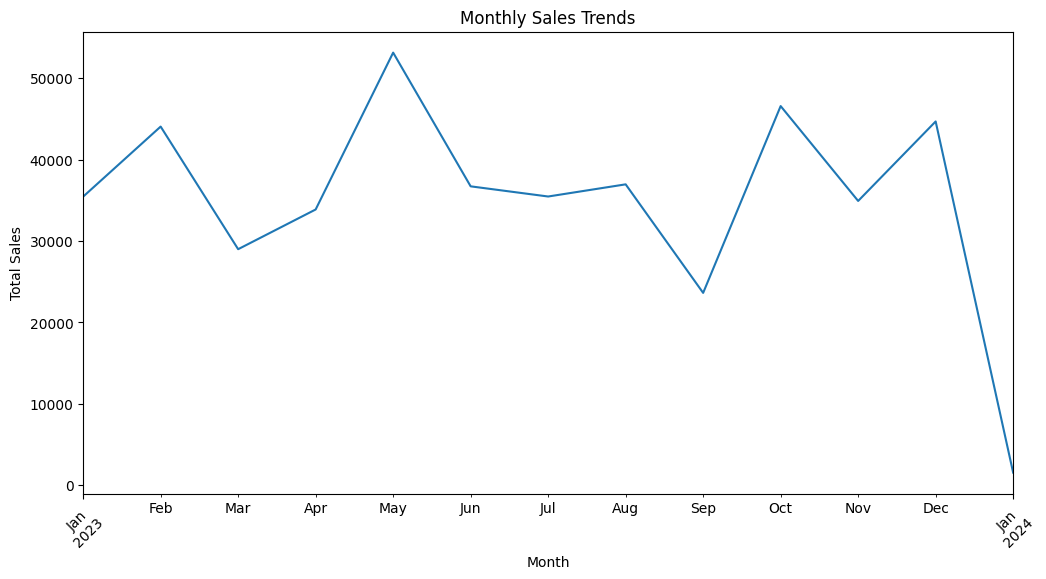

In [18]:
# Aggregate sales by month
df['Month']=df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()

# Plot monthly sales trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel("Month")
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show


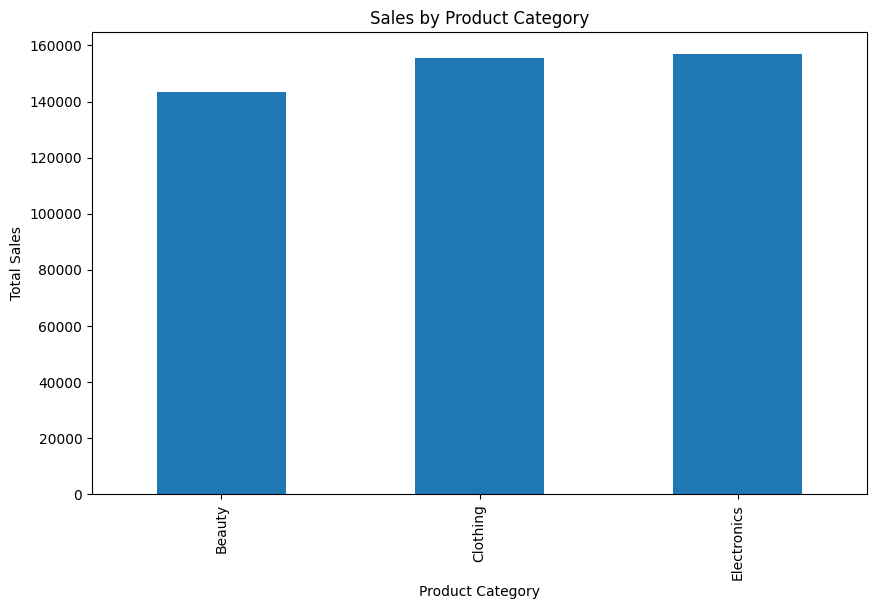

In [19]:
# Aggregate sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum()

# Plot sales by product category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8920\2594335900.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100]))['Total Amount'].sum()


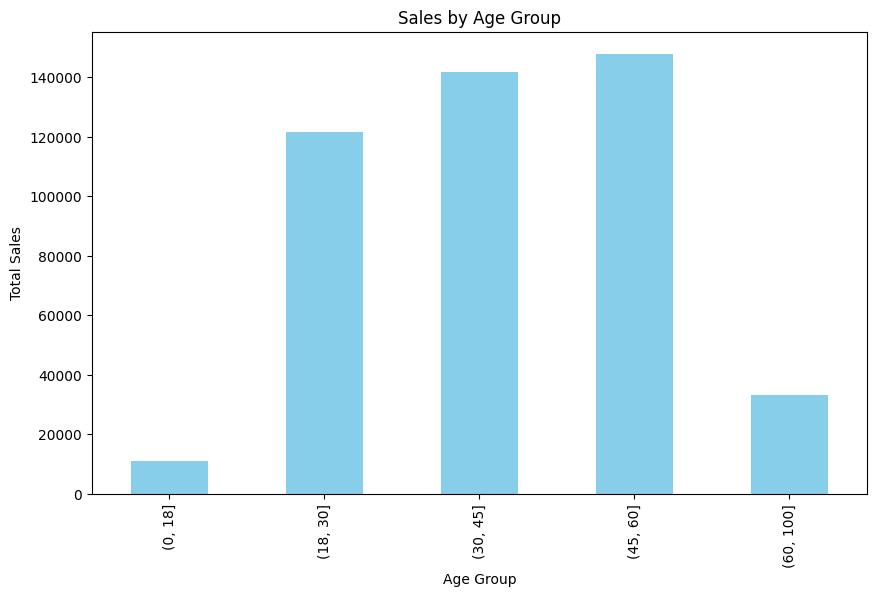

In [20]:
# Aggregate spending by customer age group
age_group_sales = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100]))['Total Amount'].sum()

# Plot sales by age group
plt.figure(figsize=(10, 6))
age_group_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

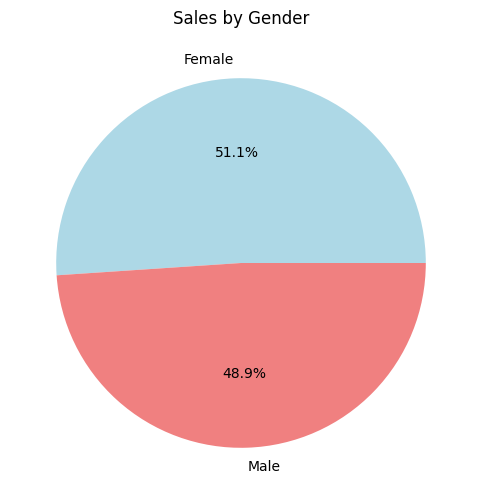

In [21]:
#Aggregate sales by gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

#plot sales by gender
plt.figure(figsize = (8,6))
gender_sales.plot(kind="pie",autopct='%1.1f%%', colors=['lightblue','lightcoral'])
plt.title('Sales by Gender')
plt.ylabel('')
plt.show()